<a href="https://colab.research.google.com/github/mishra1912/WebDevelopment2023-Shreya/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DEPENDENCIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

**IMPORTING THE BOSTON HOUSE PRICE DATASET**

In [2]:
#importing the dataset into the notebook after downloading it from kaggle
dataset = pd.read_csv('/content/BostonHousing.csv')

In [3]:
#Loading the dataset into pandas dataframe
house_price_dataframe = pd.DataFrame(dataset)

In [4]:
#print first 5 rows of the dataframe
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#add the target column to the dataframe
house_price_dataframe['price'] = house_price_dataframe['medv']

In [6]:
#print first 5 rows of the dataframe
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [7]:
#checking the number of rows and columns in the data frame
house_price_dataframe.shape

(506, 15)

**DATA PREPROCESSING**

In [8]:
#checking for missing data
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
price      0
dtype: int64

In [9]:
#statistical measures of the dataset
house_price_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


Understanding the correlation between various features in the dataset:
1. Positive Correlation
2. Negative Correlation

In [10]:
correlation = house_price_dataframe.corr()

<Axes: >

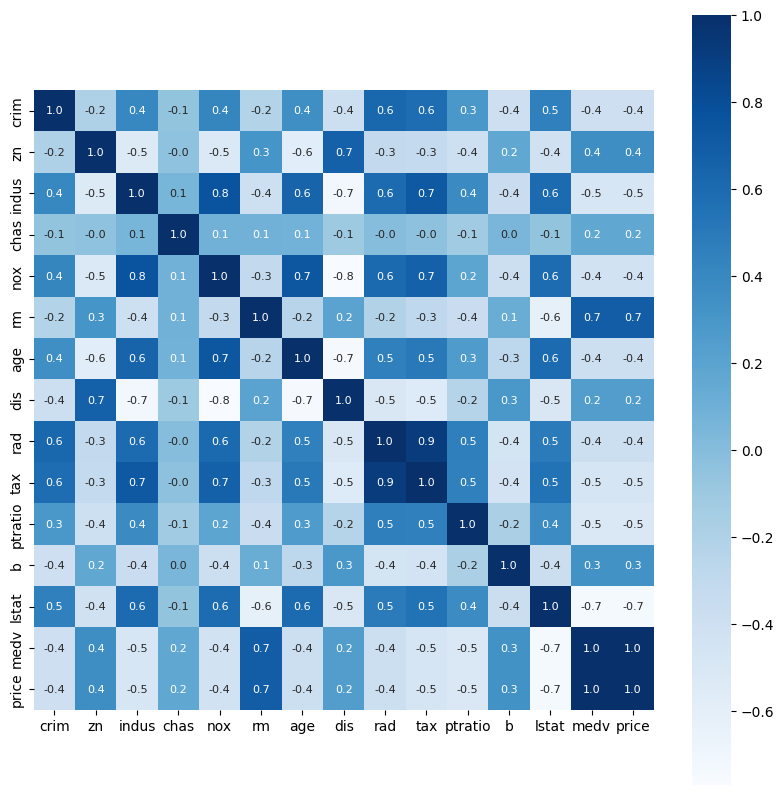

In [11]:
#constructing a heatmap to depict and understand the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**In the above given heatmap, the darker colors represent more positive correlation, and the lighter color represents more negative correlations**

**SPLITTING THE DATA INTO TRAINING SET AND TEST SET**

In [12]:
x = house_price_dataframe.drop(['price'], axis = 1)
y = house_price_dataframe['price']

print(x)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [19]:
#training set contains 80% values and test set contains 20% values
print(x.shape, x_train.shape, x_test.shape)

(506, 14) (404, 14) (102, 14)


**MODEL TRAINING**

**XGBoost Regressor**

In [33]:
# loading the model
model = XGBRegressor()

In [34]:
# training the model with x_train set
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**MODEL EVALUATION**

**Prediction on training data**

In [35]:
# accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [36]:
print(training_data_prediction)

[23.096664  21.001574  20.10024   34.700684  13.901037  13.499045
 22.000622  15.199905  10.900547  22.699903  13.801873   5.599842
 29.799076  49.999523  34.900215  20.599218  23.399805  19.202486
 32.699593  19.599394  27.000483   8.399958  46.000423  21.701403
 27.09962   19.398766  19.299393  24.799637  22.599468  31.698784
 18.500198   8.700114  17.401375  23.6992    13.299949  10.500512
 12.702455  24.999817  19.699732  14.90422   24.201471  25.00018
 14.90066   17.00027   15.601099  12.700122  24.500992  15.000621
 50.000015  17.4974    21.200356  32.00045   15.600184  22.899029
 19.29887   18.700079  23.299124  37.20052   30.09995   33.099564
 21.000408  49.99996   13.399346   5.0011516 16.499998   8.400362
 28.698318  19.499744  20.597996  45.39892   39.800728  33.400215
 19.8001    33.399807  25.300093  49.99986   12.498708  17.399752
 18.600016  22.599289  50.000793  23.802216  23.298512  23.0993
 41.698616  16.099976  31.599598  36.098694   6.9997935 20.402048
 20.00053   1

In [37]:
# R squared error
s1 = metrics.r2_score(y_train, training_data_prediction)
print('R squared error : ', s1)

# Mean Absolute Error
s2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print('Mean Absolute Error : ', s2)

R squared error :  0.9999999863800354
Mean Absolute Error :  0.0007966853604459063


**Visualizing the Actual Price and Predicted Price**

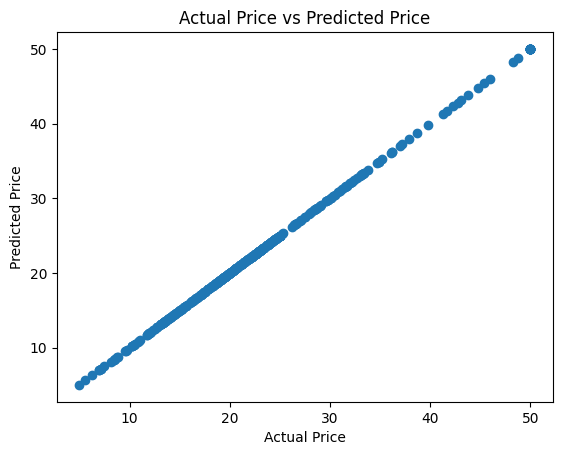

In [38]:
# using a scatter plot
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

**Prediction on test data**

In [39]:
# accuracy for predictions on test data
test_data_prediction = model.predict(x_test)

In [40]:
print(test_data_prediction)

[20.165628  15.20398   37.176445  32.58716    8.770839  14.18855
 22.002892  26.689337  14.998665  21.490643  29.326641  24.816053
 21.99971   16.126589  13.824702  21.609362  21.754631  12.790764
  7.3893404 11.969867  20.750902  19.297075  36.029255  17.406748
 16.73083   20.113913  49.99341   34.17753   34.926086  19.497438
 20.801016  21.118923  30.735018  23.503508   8.092343  15.731598
 10.977509  21.701822  23.211248  20.771591  22.034248  13.516294
 28.592695  10.793151  23.044735  13.88037   36.003086  18.429573
 30.213072  17.9688    29.909939  30.603514   5.0563297 35.228207
 27.462671  18.301756  18.579042  17.465927  15.784475  22.372587
 20.23047   20.620722  19.790241  28.302847  35.07133   27.5303
 48.499035  27.491037  10.873634  21.995447  13.087854   7.2382307
 20.57542   20.11928   24.959345  22.029747  18.96348   24.284264
 19.39186   23.909273  35.248302  19.4198    21.37987   26.483234
 37.092293  35.223896  21.355518  23.599983  24.803797  19.855515
 20.775785  

In [41]:
# R squared error
test_s1 = metrics.r2_score(y_test, test_data_prediction)
print('R squared error : ', test_s1)

# Mean Absolute Error
test_s2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print('Mean Absolute Error : ', test_s2)

R squared error :  0.9994094144429205
Mean Absolute Error :  0.13132437350703222


**Visualizing the Actual Price and Predicted Price**

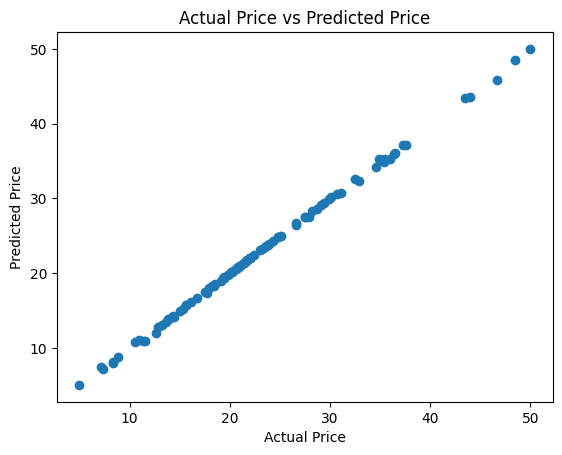

In [42]:
# using a scatter plot
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()